## Imports

In [1]:
import tensorflow.keras as keras
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

2022-08-05 14:41:02.733270: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-05 14:41:02.733328: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
%matplotlib inline
plt.rc('font', size=16)
mpl.rcParams['figure.facecolor'] = 'white'

In [3]:
def plot_results(epochs, history, metric='accuracy'):
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=range(epochs), y=history.history['loss'], label='train_loss')
    sns.lineplot(x=range(epochs), y=history.history['val_loss'], label='val_loss')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.lineplot(x=range(epochs), y=history.history[metric], label=f'Train {metric}')
    sns.lineplot(x=range(epochs), y=history.history[f'val_{metric}'], label=f'Validation {metric}')
    plt.show()

## Daten einlesen

In [4]:
iris_df = sns.load_dataset("iris")

In [5]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


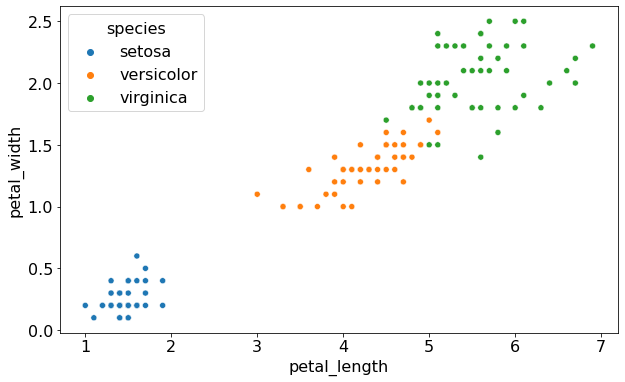

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris_df, x="petal_length", y="petal_width", hue="species")
plt.show()

Führen Sie einen Train-Test Split aus. Übernehmen Sie hierfür species als target und fügen Sie die restlichen Spalten als Features ein.

In [7]:
X = iris_df.drop(columns='species')
y = iris_df.species

Führen Sie nun ein LabelEncoding für Ihr Target und eine Z-Transformation (StandardScaler) für Ihre Features durch.

In [8]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=5)

Bilden Sie nun das Sequentielle Modell. Wie vorher können Sie gerne den Code im Vorschau-Notebook nachschauen. Achten Sie auf die Änderung im Output-Layer (activation='softmax' statt 'linear'). Versuchen Sie die Anzahl Neuronen und Layer zu ändern bis Sie auf eine Accuracy über 80% kommen.

In [18]:
model = keras.models.Sequential() # einfachste Art von neuronalem Netz
model.add(keras.layers.Input(shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

In [19]:
BATCHSIZE = 32
EPOCHS = 30
LR = 0.01

In [20]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=LR),
            #   optimizer=keras.optimizers.Adam(learning_rate=LR),  # replacing SGD with Adam can lead to even better results
              metrics=["accuracy"])

In [21]:
history = model.fit(X_train,y_train, batch_size=BATCHSIZE, epochs=EPOCHS, validation_split=0.2)

Epoch 1/30
3/3 [==============================] - 0s 63ms/step - loss: 1.0840 - accuracy: 0.6562 - val_loss: 1.0985 - val_accuracy: 0.5417
Epoch 2/30
3/3 [==============================] - 0s 14ms/step - loss: 1.0510 - accuracy: 0.6562 - val_loss: 1.0682 - val_accuracy: 0.5417
Epoch 3/30
3/3 [==============================] - 0s 12ms/step - loss: 1.0188 - accuracy: 0.6771 - val_loss: 1.0395 - val_accuracy: 0.5833
Epoch 4/30
3/3 [==============================] - 0s 12ms/step - loss: 0.9891 - accuracy: 0.6771 - val_loss: 1.0126 - val_accuracy: 0.5833
Epoch 5/30
3/3 [==============================] - 0s 14ms/step - loss: 0.9612 - accuracy: 0.6771 - val_loss: 0.9872 - val_accuracy: 0.5833
Epoch 6/30
3/3 [==============================] - 0s 14ms/step - loss: 0.9347 - accuracy: 0.6875 - val_loss: 0.9629 - val_accuracy: 0.5833
Epoch 7/30
3/3 [==============================] - 0s 13ms/step - loss: 0.9097 - accuracy: 0.6875 - val_loss: 0.9398 - val_accuracy: 0.5833
Epoch 8/30
3/3 [===========

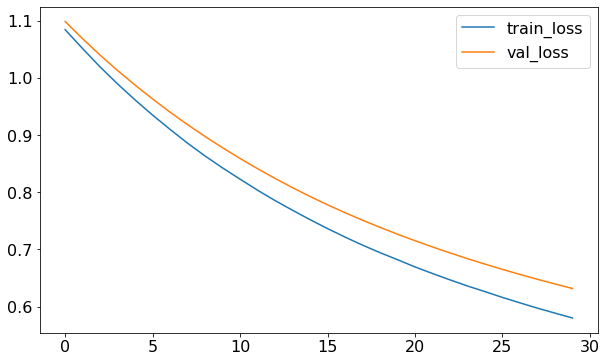

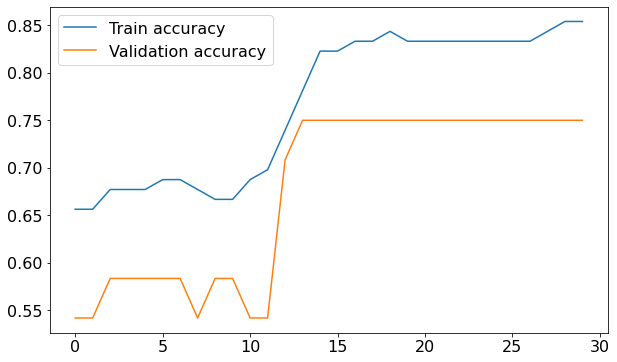

In [22]:
plot_results(EPOCHS, history)

In [23]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 17ms/step - loss: 0.6643 - accuracy: 0.8667


[0.6643192768096924, 0.8666666746139526]